In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [2]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w",]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]


lens = [["6", "4"]]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 

# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
# for a in caida0517:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    # for b in caida0816:
    #     for l in lens:
    #         pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap']
Total Pcap File Number: 12


In [3]:
def prepare_are_dict(width):
    ARE_dict = {}
    if width == 1024:
        ARE_dict["caida0517-500w"] = (31.5, 16.41, "cs")
        ARE_dict["caida0517-250w"] = (17.26, 10.83, "cs")
        ARE_dict["caida0517-150w"] = (12.97, 10.25, "cs")
        ARE_dict["caida0517-070w"] = (7.04, 7.16, "cm")
        ARE_dict["caida0517-030w"] = (4.02, 3.80, "cs")
        ARE_dict["zipf2a-150w"] = (6.54, 8.84, "cm")
        ARE_dict["zipf2a-070w"] = (4.07, 4.97, "cm")
        ARE_dict["zipf2a-030w"] = (3.70, 4.35, "cm")
        ARE_dict["zipf10-070w"] = (5.49, 9.15, "cm")
        ARE_dict["zipf10-030w"] = (1.83, 6.43, "cm")
    elif width == 2048:
        ARE_dict["caida0517-500w"] = (11.49, 7.31, "cs")
        ARE_dict["caida0517-250w"] = (5.92, 4.44, "cs")
        ARE_dict["caida0517-150w"] = (5.40, 5.54, "cm")
        ARE_dict["caida0517-070w"] = (2.22, 4.12, "cm")
        ARE_dict["caida0517-030w"] = (1.28, 1.86, "cm")
        ARE_dict["zipf2a-150w"] = (2.37,  1.96, "cs")
        ARE_dict["zipf2a-070w"] = (1.47, 1.451, "cs")
        ARE_dict["zipf2a-030w"] = (1.23, 1.02, "cs")
        ARE_dict["zipf10-070w"] = (1.34, 3.32, "cm")
        ARE_dict["zipf10-030w"] = (0.23, 2.43, "cm")
    elif width == 4096:
        ARE_dict["caida0517-500w"] = (3.76, 3.43, "cs")
        ARE_dict["caida0517-250w"] = (2.11, 1.70, "cs")
        ARE_dict["caida0517-150w"] = (1.58, 1.70, "cm")
        ARE_dict["caida0517-070w"] = (0.61, 1.87, "cm")
        ARE_dict["caida0517-030w"] = (0.26, 0.83, "cm")
        ARE_dict["zipf2a-150w"] = (0.88, 0.90, "cm")
        ARE_dict["zipf2a-070w"] = (0.52, 0.51, "cs")
        ARE_dict["zipf2a-030w"] = (0.43, 0.33, "cs")
        ARE_dict["zipf10-070w"] = (0.42, 1.61, "cm")
        ARE_dict["zipf10-030w"] = (0.01, 0.10, "cm")
    
    return ARE_dict

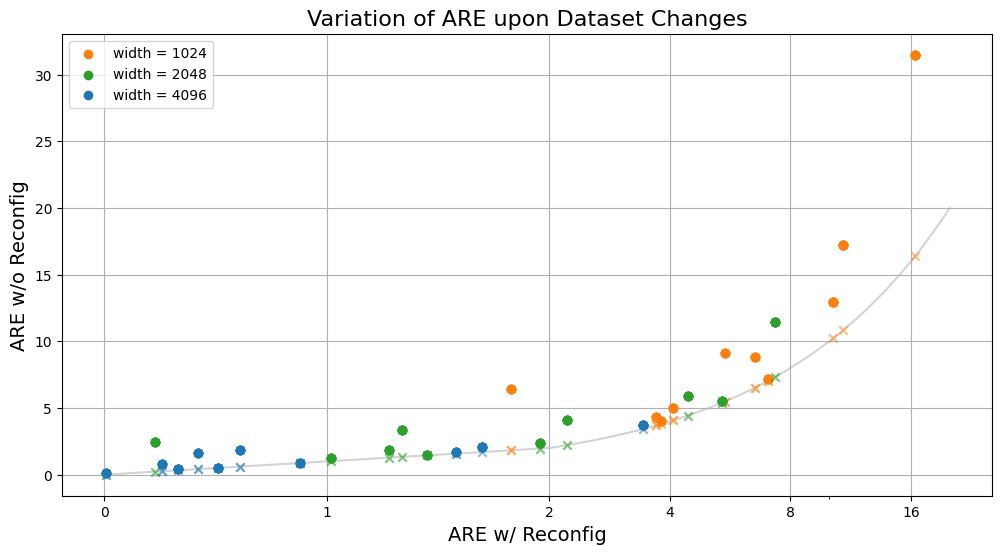

In [4]:
def plot_scatter_diagram():
    pcap_list = caida0517 + zipf2a + zipf10
    widths = [1024, 2048, 4096]
    color = ["tab:orange", "tab:green", "tab:blue"]
    nodes_sets = []
    for i in range(len(widths)):
        are_dict = prepare_are_dict(widths[i])
        nodes = []
        
        for pcap1 in pcap_list:
            for pcap2 in pcap_list:
                if pcap1 != pcap2:
                    if are_dict[pcap1][2] != are_dict[pcap2][2]: # choose diff algo
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][1]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][0]))
                    else:
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][0]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][1]))
        nodes_sets.append(nodes)
                       

    
    
    plt.figure(figsize=(12, 6))
    x_values = np.linspace(0, 20, 100)  # Adjust the range of x-values as needed
    plt.plot(x_values, x_values, color='lightgray', linestyle='-', zorder=1)
    for nodes, col in zip(nodes_sets, color):
        x_coords = [node[0] for node in nodes]
        y_coords = [node[1] for node in nodes]
        plot=0
        for i in range(len(x_coords)):
            # if x_coords[i] >= 20 or y_coords[i] >= 20:
                # continue
            if x_coords[i] != y_coords[i]:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=1.0, marker='o', zorder=2, label=f'width = {widths[color.index(col)]}' if plot == 0 else None)  
                plot = 1
            else:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=0.2, marker='x', zorder=2)  

    plt.xlabel('ARE w/ Reconfig', fontsize=14)
    plt.ylabel('ARE w/o Reconfig', fontsize=14)
    plt.title('Variation of ARE upon Dataset Changes', fontsize=16)
    plt.xscale('symlog')
    plt.xticks([0, 1, 2, 4, 8, 16], ['0', '1', '2', '4', '8', '16'])
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_scatter_diagram()